In [1]:
# Parameters
cur_x = 2              # Starting point for x
rate = 0.01            # Learning rate
precision = 0.000001   # Precision for stopping the loop
max_iters = 1000       # Maximum number of iterations

# Gradient function for y = (x + 3)^2
df = lambda x: 2 * (x + 3)

# Gradient Descent loop
for _ in range(max_iters):
    prev_x = cur_x
    cur_x -= rate * df(prev_x)           # Update x by moving opposite to the gradient
    if abs(prev_x - cur_x) < precision:  # Stop if updates are smaller than precision
        break

print("Local Minimum occurs at:", cur_x)


Local Minimum occurs at: -2.999951128099859


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


data1=pd.read_csv("uber.csv")
data1.head()
data1.tail()
data1.info()
data1["pickup_datetime"]=pd.to_datetime(data1["pickup_datetime"])
data1.isnull()
data1.isnull().sum()
data1.dropna(inplace=True)
data1.isnull().sum()
x=(data1.drop(["fare_amount", "Unnamed: 0","pickup_datetime","key"],axis=1))
y=data1["fare_amount"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x.dtypes)
print(x.columns)
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)
pred = lrmodel.predict(x_test)
lrmodelrmse = np.sqrt(mean_squared_error(pred, y_test))
print("RMSE error is: ",lrmodelrmse)
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 101)
rfrmodel.fit(x_train, y_train)
rfrmodel_pred = rfrmodel.predict(x_test)
rfrmodel_rmse = np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RFR RMSE error is: ", rfrmodel_rmse)
pred = lrmodel.predict(x_test)
print("hh",pred)
lrmodel.predict(x_test)
from sklearn import metrics
metrics.r2_score(y_test, pred)
metrics.r2_score(y_test, rfrmodel_pred)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object
Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='ob

0.7912596202765285

C:\Users\varsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

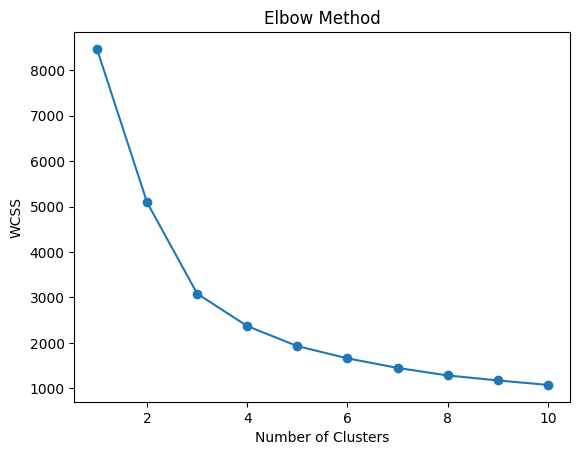

C:\Users\varsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


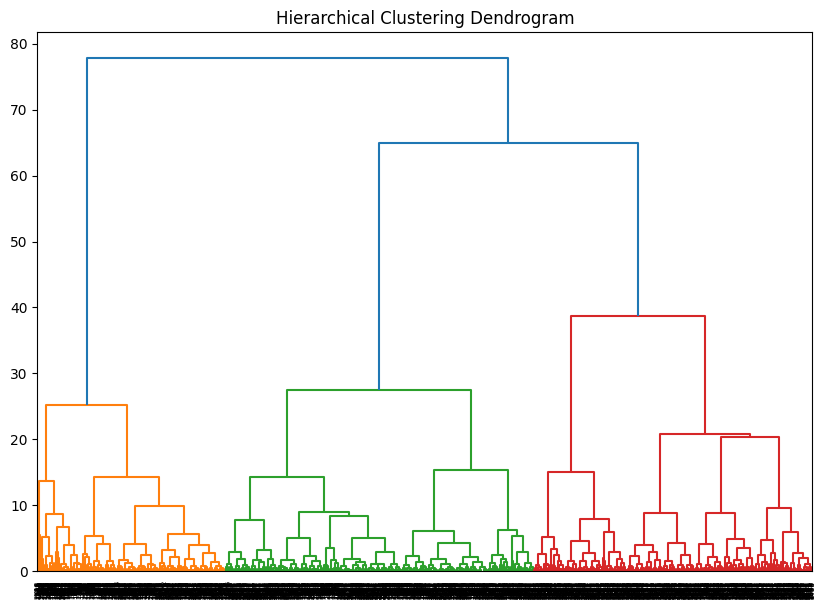

     SALES  QUANTITYORDERED  PRICEEACH  KMeans_Cluster  Hierarchical_Cluster
0  2871.00               30      95.70               2                     2
1  2765.90               34      81.35               2                     2
2  3884.34               41      94.74               1                     1
3  3746.70               45      83.26               1                     3
4  5205.27               49     100.00               1                     1


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the dataset
data = pd.read_csv('sales_data_sample.csv',  encoding='latin1')  # Update path if necessary

# Select relevant numerical features for clustering (adjust column names if necessary)
# Here we assume columns like 'SALES', 'QUANTITYORDERED', and 'PRICEEACH'
features = data[['SALES', 'QUANTITYORDERED', 'PRICEEACH']].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Set the optimal cluster number based on the elbow graph
optimal_clusters = 3  # Update based on elbow plot result

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Apply Hierarchical Clustering
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Assign clusters based on dendrogram results
data['Hierarchical_Cluster'] = fcluster(linked, optimal_clusters, criterion='maxclust')

# Display a few rows with cluster labels
print(data[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'KMeans_Cluster', 'Hierarchical_Cluster']].head())



In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('emails.csv')

# Prepare features (all columns except 'Email No.' and 'Prediction') and target (Prediction)
X = data.drop(columns=['Email No.', 'Prediction'])
y = data['Prediction']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Support Vector Machine model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate the models
print("K-Nearest Neighbors Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

print("\nSupport Vector Machine Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


K-Nearest Neighbors Performance:
Accuracy: 0.8608247422680413
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      1097
           1       0.73      0.83      0.78       455

    accuracy                           0.86      1552
   macro avg       0.83      0.85      0.84      1552
weighted avg       0.87      0.86      0.86      1552

Confusion Matrix:
 [[958 139]
 [ 77 378]]

Support Vector Machine Performance:
Accuracy: 0.9568298969072165
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1097
           1       0.92      0.93      0.93       455

    accuracy                           0.96      1552
   macro avg       0.95      0.95      0.95      1552
weighted avg       0.96      0.96      0.96      1552

Confusion Matrix:
 [[1062   35]
 [  32  423]]


In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv("Churn_Modelling.csv")

# Step 1: Preprocess the dataset
# Drop unnecessary columns
X = df.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname'])
y = df['Exited']  # Target variable

# Encoding categorical features
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build the neural network model
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Step 4: Evaluate the model
# Predictions and evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


C:\Users\varsh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.8585
Confusion Matrix:
 [[1548   59]
 [ 224  169]]


<Axes: >

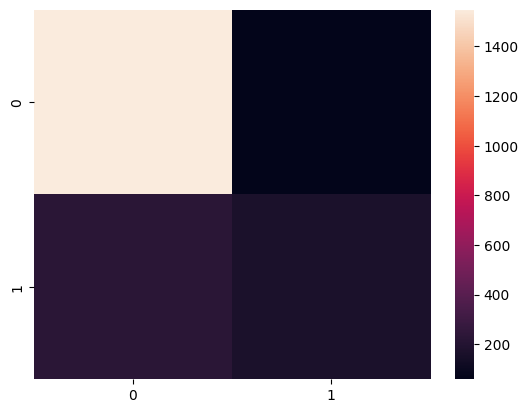

In [7]:
import seaborn as sns
sns.heatmap(conf_matrix)